# Assumption Test: Linearity in Parameters

**Theory reference**
- `theory/assumptions.md` (Linearity in parameters)
- `theory/failure_modes.md`

## Role of this notebook
This notebook evaluates the *linearity-in-parameters* assumption of ordinary least squares
by intentionally applying a linear regression model to a non-linear data-generating process.

It demonstrates a **structural failure mode** where the model class is insufficient,
even under ideal optimization and data conditions.

## Assumption under test
The target can be reasonably approximated as a linear combination of the chosen features.

## Expected failure signals
- Systematic structure in residuals
- Curvature in residuals vs input
- Consistent bias across input regions

## What this notebook does NOT show
- Optimization failures
- Noise-induced variance
- Data scarcity effects
- Regularization behavior

All non-essential factors are intentionally frozen to isolate the assumption violation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Data-generating process

The target is generated using a non-linear function of the input feature.
This explicitly violates the linearity-in-parameters assumption while
preserving all other favorable conditions (noise level, sample size, IID sampling).

In [2]:
np.random.seed(42)

X = np.linspace(0, 10, 200).reshape(-1, 1)

noise = np.random.normal(loc=0.0, scale=1.0, size=len(X))

# Non-linear data-generating process
y = (
    0.5 * X.squeeze() ** 2
    + 1.0 * X.squeeze()
    + 5.0
    + noise
)

### Train / test split

The train/test split is preserved for consistency with the baseline experiment.
Although the expected failure is structural, this separation prevents attributing
the observed behavior to overfitting or data leakage.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Model under test

The same linear regression model used in the baseline notebook is applied here
without modification. No regularization, feature transformation, or optimization
tuning is introduced.

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Residual computation

Residuals are computed as the primary diagnostic signal.
No performance optimization or metric-driven evaluation is performed at this stage.

In [5]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

### Residuals vs input feature

Under the linearity-in-parameters assumption, residuals should appear as random
scatter around zero with no systematic structure.

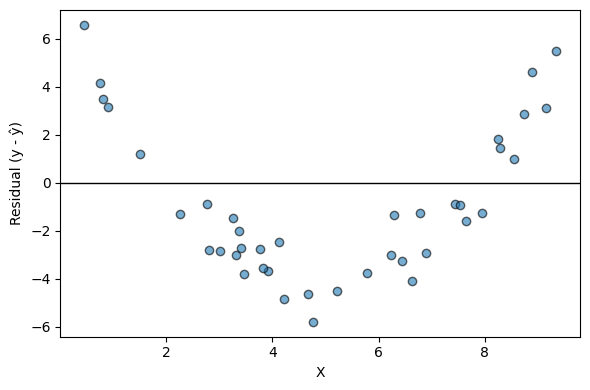

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(X_test, residuals, alpha=0.6, edgecolor="k")
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("X")
plt.ylabel("Residual (y - ŷ)")
plt.tight_layout()
plt.show()

### Interpretation: structural violation

The residuals exhibit a clear curved structure rather than random scatter around zero.
This indicates a systematic mis-specification of the relationship between the input
feature and the target.

The observed pattern is not attributable to noise, data scarcity, or optimization.
It reflects a violation of the linearity-in-parameters assumption: the model class
cannot represent the underlying data-generating process.

Because the error structure is deterministic, collecting more data would preserve
the same curvature rather than eliminate it.

### Residuals vs predicted values

Plotting residuals against predicted values provides an alternative view of the
error structure. Under a valid linear model, no systematic pattern should emerge
in this space either.


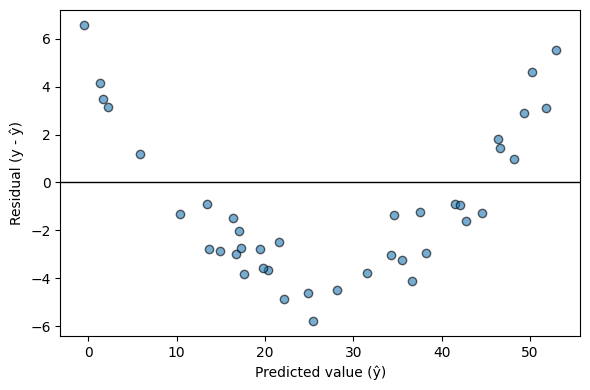

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor="k")
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Predicted value (ŷ)")
plt.ylabel("Residual (y - ŷ)")
plt.tight_layout()
plt.show()

### Metric anchor

A single error metric is computed solely as a numerical reference.
The evaluation of model validity in this notebook is driven by residual structure,
not by aggregate performance scores.

In [8]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

10.574835899166303

### Conclusion

This experiment demonstrates a structural failure of linear regression when the
linearity-in-parameters assumption is violated.

Despite stable optimization, sufficient data, and reasonable aggregate error,
the residual diagnostics reveal a deterministic error pattern that invalidates
the model for this problem.

This failure cannot be corrected through additional data collection or
hyperparameter adjustment. The appropriate response is to change the model
representation or feature space, not to further tune the linear model.

In a production setting, this model would be rejected based on residual
diagnostics alone.